In [1]:
import pandas as pd
import numpy as np

# Modelo Recurrentes con Embeddings a nivel de caracter

In [2]:
df = pd.read_csv('acetylcholinesterase_02_bioactivity_data_preprocessed_4.csv')

In [3]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50,pIC50_2,canonical_len
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124881,6.124881,37
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,6.999566,6.999566,42
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301029,4.301029,49
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522734,6.522734,45
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096856,6.096856,41


# Canonical_smiles To secuence

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Utilizando Tokenizer y pad_sequences de keras a nivel de caracter, obtener la entrada tokenizada. Por ejemplo:

**El smiles**:

'C[C@@]12CC[C@H]3[C@]4(C)CCC[C@@]5(C)C(=O)OCC[N+](C)(C)CCCCCCCCC[N+](C)(C)CCOC(=O)[C@]6(C)CCC[C@]7(C)[C@@H]6CC[C@@]68C[C@@H](OC(=O)CCCCCCCCC(=O)O[C@@H]1C[C@@]3(CC[C@@H]45)C2)[C@@](C)(CC[C@@H]76)C8.[Br-].[Br-]'

**Tendría que quedar algo asi (puede que no sea exacto):**

array([ 2, 11,  2, 13, 13, 12,  5,  7,  2,  2, 11,  2, 13, 16, 12, 10, 11,
        2, 13, 12, 15,  3,  2,  4,  2,  2,  2, 11,  2, 13, 13, 12, 23,  3,
        2,  4,  2,  3,  9,  6,  4,  6,  2,  2, 11,  8, 21, 12,  3,  2,  4,
        3,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2, 11,  8, 21, 12,  3,
        2,  4,  3,  2,  4,  2,  2,  6,  2,  3,  9,  6,  4, 11,  2, 13, 12,
       30,  3,  2,  4,  2,  2,  2, 11,  2, 13, 12, 35,  3,  2,  4, 11,  2,
       13, 13, 16, 12, 30,  2,  2, 11,  2, 13, 13, 12, 30, 36,  2, 11,  2,
       13, 13, 16, 12,  3,  6,  2,  3,  9,  6,  4,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  9,  6,  4,  6, 11,  2, 13, 13, 16, 12,  5,  2, 11,
        2, 13, 13, 12, 10,  3,  2,  2, 11,  2, 13, 13, 16, 12, 15, 23,  4,
        2,  7,  4, 11,  2, 13, 13, 12,  3,  2,  4,  3,  2,  2, 11,  2, 13,
       13, 16, 12, 35, 30,  4,  2, 36, 20, 11, 25, 26, 17, 12, 20, 11, 25,
       26, 17, 12], dtype=int32)
       

**Otro ejemplo:**
smiles: 'NC(=O)O'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 8, 2, 3, 9, 6, 4, 6], dtype=int32)

**Tener en cuenta:**

- Ver cuanta es la máxima longitud para agregar el padding correspondiente
- En el ejemplo se agrego padding a la izquierda

In [5]:
max_len_idx = df['canonical_smiles'].apply(len).argmax()
min_len_idx = df['canonical_smiles'].apply(len).argmin()

In [73]:
X = df['canonical_smiles']
#y = df['pIC50_2']
y = df['pIC50']

In [74]:
# Implementar tokenización y guardar en X_seq_pad el dataset tokenizado
#Tokenizacion
tokenizer = Tokenizer(
    num_words=None,
    filters=None,
    lower=False,
    split='',
    char_level=True,
)
tokenizer.fit_on_texts(X)

#Indice de tokens
word_index=tokenizer.word_index

#Codificacion de los smiles en secuencias de tokens
X_seq=tokenizer.texts_to_sequences(X)

#Maxima longitud de secuencia
maxlen=max([len(x) for x in X_seq])

#Padding a la iaquierda de las scuencias
X_seq_pad = pad_sequences(X_seq,padding='pre',maxlen=maxlen)


In [75]:
print("Word index (longitud ", len(word_index)," tokens):\n",word_index,"\n\nPadded trainig sequences:\n", X_seq_pad,"\n\nPadded trainig shape:\n",X_seq_pad.shape, sep='')
print(type(X_seq_pad))

Word index (longitud 38 tokens):
{'c': 1, 'C': 2, '(': 3, ')': 4, '1': 5, 'O': 6, '2': 7, 'N': 8, '=': 9, '3': 10, '[': 11, ']': 12, 'n': 13, '@': 14, '4': 15, 'H': 16, '-': 17, '/': 18, 'l': 19, '.': 20, '+': 21, 'F': 22, '5': 23, 'o': 24, 'B': 25, 'r': 26, 'S': 27, '\\': 28, '#': 29, 's': 30, '6': 31, 'I': 32, 'e': 33, 'P': 34, '7': 35, '8': 36, 'i': 37, 'a': 38}

Padded trainig sequences:
[[ 0  0  0 ...  4 24  5]
 [ 0  0  0 ...  2  2  5]
 [ 0  0  0 ...  1  1  5]
 ...
 [ 0  0  0 ...  5  6  2]
 [ 0  0  0 ...  1  5  6]
 [ 0  0  0 ...  7  9  6]]

Padded trainig shape:
(5664, 207)
<class 'numpy.ndarray'>


# Split

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_seq_pad, y, test_size=0.2, random_state=42)

In [78]:
len(X_train), len(y_train), len(X_test)

(4531, 4531, 1133)

# Network Model

In [79]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K

In [80]:
# Métrica

def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [81]:
# vocab_size = # Completar largo del vocabulario
vocab_size = len(word_index)
print(vocab_size)

38


In [82]:
max_sequence_len = max(list(map(lambda n: len(X_seq_pad[n]), X_seq_pad))) # Completar (aunque sé que por el padding tienen todos el mismo largo)

# Armar modelo en keras de LSTM
El de abajo es un ejemplo propuesto pero puede armar otro similar (siempre con LSTM o GRU)

In [140]:
model = Sequential()
cells=100
# Implementar modelo completo
model.add(Embedding(vocab_size+1,32,input_length=max_sequence_len))
model.add(Bidirectional(LSTM(cells,return_state=False, return_sequences=False, activation='tanh')))
model.add(Dense(50,activation='linear'))
#model.add(BatchNormalization())
model.add(Dropout(0.8))
model.add(Activation('relu'))
model.add(Dense(1, activation='linear'))

In [141]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 207, 32)           1248      
                                                                 
 bidirectional_8 (Bidirectio  (None, 200)              106400    
 nal)                                                            
                                                                 
 dense_16 (Dense)            (None, 50)                10050     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 activation_8 (Activation)   (None, 50)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                      

In [142]:
model.compile(optimizer=RMSprop(learning_rate=0.01), loss='mse', metrics=[R2])

In [143]:
mcp = ModelCheckpoint('models/best_model_{epoch}', save_best_only=True, save_format="h5")

In [144]:
from helper import PlotLosses
plot_losses = PlotLosses(1, None)

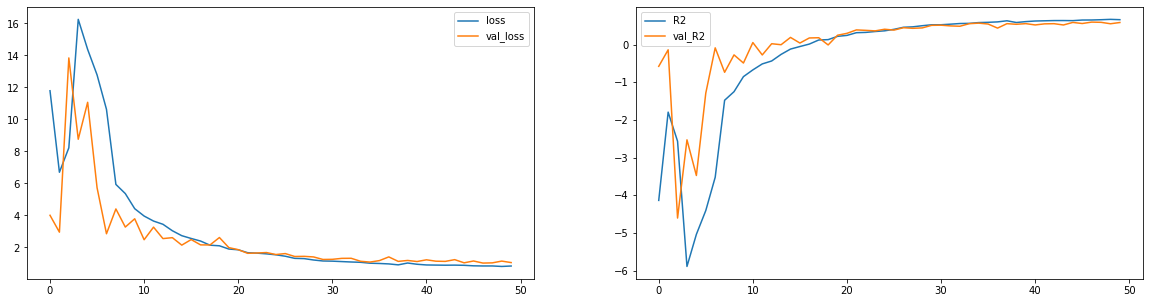

36/36 [==============================] - 29s 795ms/step - loss: 0.8345 - R2: 0.6594 - val_loss: 1.0489 - val_R2: 0.5847


In [145]:
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), callbacks=[plot_losses])

In [146]:
y_pred = model.predict(X_test)

36/36 [==============================] - 3s 61ms/step


# Score

In [147]:
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

In [148]:
r2
# 0.4984533246797399

0.6033206693160067

In [149]:
model.save('models/embed_32_bi_lstm_100_dense_50_drop08_pre_lr01_ep50.h5', )

# Resultados

##### embed_38_bi_lstm_100_dense_50_bn_lr001 --> val_R2 = 0.41087732228544704
##### embed_16_bi_lstm_100_dense_50_bn_lr001 --> val_R2 = 0.4388302982894927
### precompl = variable normalizada y con el epsilon en el proprocesamiento
##### embed_16_bi_lstm_100_dense_50_bn_precompl_lr001 --> val_R2 = 0.46263594344711856
##### embed_8_bi_lstm_100_dense_50_bn_precompl_lr001 --> val_R2 = -0.10804766725816273
##### embed_4_bi_lstm_100_dense_50_bn_precompl_lr001 --> val_R2 = 0.4481453639360736
##### embed_2_bi_lstm_100_dense_50_bn_precompl_lr001 --> val_R2 = -1.877394605306646
##### embed_16_bi_lstm_50_dense_50_bn_precompl_lr001 --> val_R2 = 0.39947726946182016
##### embed_16_bi_lstm_50_dense_50_drop08_precompl_lr001 --> val_R2 = 0.357646487725111
##### embed_16_bi_lstm_100_dense_50_drop08_precompl_lr001 --> val_R2 = 0.42838268122277134
##### embed_32_bi_lstm_100_dense_50_drop08_precompl_lr001 --> val_R2 = 0.3415522911934644
##### embed_64_bi_lstm_100_dense_50_drop08_precompl_lr001 --> val_R2 = 0.44609475951239064
##### embed_4_bi_lstm_100_dense_50_drop08_precompl_lr001 --> val_R2 =  0.1621242747898115
  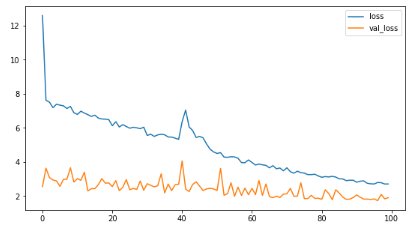
### pre = variable sin normalizar en el preprocesamiento
##### embed_64_bi_lstm_100_dense_50_drop08_pre_lr001 --> val_R2 =  0.5703483144323962
  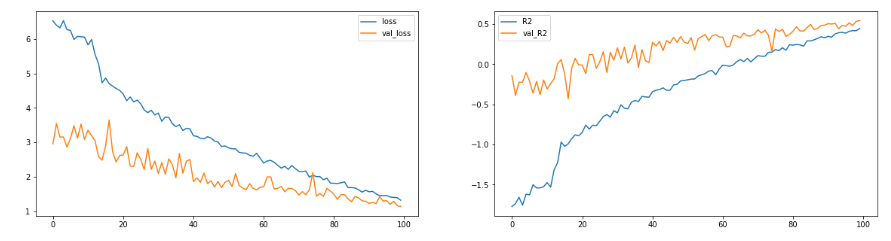
### Cambiando el lr a 0.01
##### embed_64_bi_lstm_100_dense_50_drop08_pre_lr01 --> val_R2 = 0.6302058543334299
  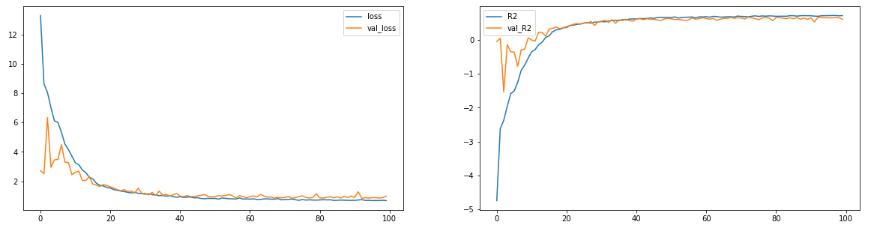
### Cambiando el lr a 0.05
##### embed_64_bi_lstm_100_dense_50_drop08_pre_lr05_ep27 -> val_R2 = -2.3896734968609223e-07
  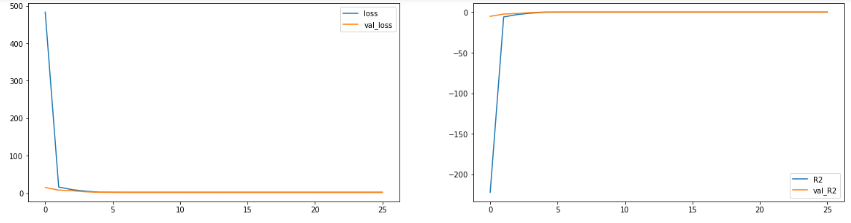 (lo frene)
##### embed_32_bi_lstm_100_dense_50_drop08_pre_lr01_ep50 -> val_R2 = 0.6033206693160067
  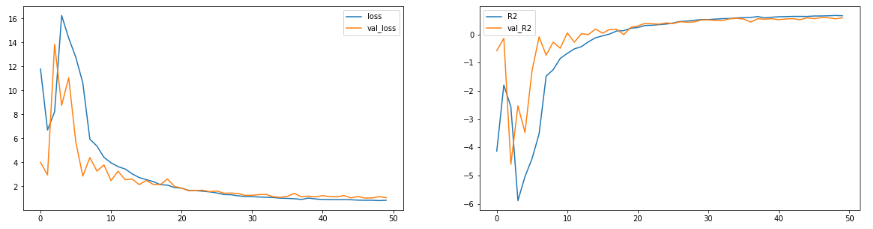

# Load model (solo si se grabo el modelo)

In [114]:
from tensorflow.keras.models import load_model

In [154]:
model_loaded = load_model('models/embed_64_bi_lstm_100_dense_50_drop08_pre_lr01.h5', custom_objects={'R2': R2})

In [155]:
y_pred = model_loaded.predict(X_test)

36/36 [==============================] - 4s 83ms/step


In [156]:
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
r2

0.6302058543334299

¿Hasta que valores de r2 logró?

#### El mejor fue val_r2 = 0.63

# Evaluación

<function matplotlib.pyplot.show(*args, **kw)>

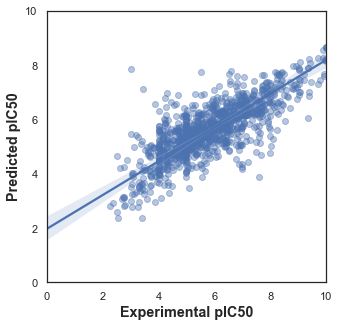

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.figure.set_size_inches(5, 5)
plt.show